In [36]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [37]:
"""target domain数据集在每个BN层的mean"""
with open("D:\Desktop\painting\imagenet_c\gaussian_noise_mean_per_layer.pkl","rb") as  f:
    data1 = torch.load(f,map_location=torch.device("cpu"))

"""target domain数据集在每个BN层的var"""
with open("D:\Desktop\painting\imagenet_c\gaussian_noise_var_per_layer.pkl","rb") as  f:
    data2 = torch.load(f,map_location=torch.device("cpu"))


In [38]:
"""target domain当前batch1数据集在每个BN层的mean（通过第一层的KL修改所有层的mean）"""
with open("D:\Desktop\painting\imagenet_c\gaussian_noise_batch1_mean_per_layer_by_cov1.pkl","rb") as  f:
    data3 = torch.load(f,map_location=torch.device("cpu"))

"""target domain当前batch1数据集在每个BN层的var（通过第一层的KL修改所有层的var）"""
with open("D:\Desktop\painting\imagenet_c\gaussian_noise_batch1_var_per_layer_by_cov1.pkl","rb") as  f:
    data4 = torch.load(f,map_location=torch.device("cpu"))


In [39]:
"""target domain当前batch1数据集在每个BN层的mean（计算每一层的KL分别修改所有层的mean）"""
with open("D:\Desktop\painting\imagenet_c\gaussian_noise_batch1_mean_per_layer_by_per_layer.pkl","rb") as  f:
    data5 = torch.load(f,map_location=torch.device("cpu"))

"""target domain当前batch1数据集在每个BN层的var（计算每一层的KL分别修改所有层的var）"""
with open("D:\Desktop\painting\imagenet_c\gaussian_noise_batch1_var_per_layer_by_per_layer.pkl","rb") as  f:
    data6 = torch.load(f,map_location=torch.device("cpu"))

In [40]:
dis1 = []
for idx in range(len(data1)):
    diff = data1[idx] - data3[idx]
    squared_diff = torch.pow(diff,2)
    sum_squared_diff = torch.sum(squared_diff)
    l2_dis = torch.sqrt(sum_squared_diff)
    dis1.append(l2_dis.item())
dis1

[0.6630620956420898,
 4.163616180419922,
 2.4699032306671143,
 1.3421722650527954,
 8.182538986206055,
 1.0016800165176392,
 0.8713895678520203,
 0.8512279987335205,
 1.12051522731781,
 0.7161878943443298,
 0.7531218528747559,
 1.7500275373458862,
 1.1865606307983398,
 1.3676739931106567,
 2.671786069869995,
 1.6503245830535889,
 2.586322546005249,
 1.0502485036849976,
 1.3312427997589111,
 1.5377824306488037,
 0.739977240562439,
 1.3292454481124878,
 1.206450343132019,
 0.9731178879737854,
 1.9115750789642334,
 1.6086537837982178,
 2.0682263374328613,
 2.9376516342163086,
 2.3459980487823486,
 2.537165403366089,
 1.0699466466903687,
 1.3375924825668335,
 1.2793128490447998,
 0.9273662567138672,
 1.260926604270935,
 1.4247649908065796,
 0.8772874474525452,
 1.1998121738433838,
 1.310500979423523,
 0.836225688457489,
 1.1152279376983643,
 1.3289003372192383,
 1.0217649936676025,
 1.36053466796875,
 1.2518329620361328,
 2.014326333999634,
 1.8456627130508423,
 5.705618381500244,
 1.76726

In [41]:
dis2= []
for idx in range(len(data2)):
    diff = data2[idx] - data4[idx]
    squared_diff = torch.pow(diff,2)
    sum_squared_diff = torch.sum(squared_diff)
    l2_dis = torch.sqrt(sum_squared_diff)
    dis2.append(l2_dis.item())
dis2

[37.407188415527344,
 0.49212419986724854,
 0.3350857198238373,
 0.1348845362663269,
 0.5954129099845886,
 0.1685771346092224,
 0.10664427280426025,
 0.028815563768148422,
 0.11445987224578857,
 0.0963401347398758,
 0.024920905008912086,
 0.3280942738056183,
 0.19046252965927124,
 0.055992208421230316,
 0.3984256386756897,
 0.7210288643836975,
 0.2849913537502289,
 0.07731660455465317,
 0.3420114517211914,
 0.18916510045528412,
 0.04216014966368675,
 0.1481991410255432,
 0.07076069712638855,
 0.024085376411676407,
 0.3517584800720215,
 0.24194444715976715,
 0.08160329610109329,
 0.2465803325176239,
 0.20473633706569672,
 0.2045697569847107,
 0.04448438063263893,
 0.14523658156394958,
 0.12943534553050995,
 0.028234301134943962,
 0.10265228152275085,
 0.07617536187171936,
 0.02059919759631157,
 0.0898938849568367,
 0.06042236462235451,
 0.02031642384827137,
 0.09357597678899765,
 0.08890719711780548,
 0.03270512819290161,
 0.08345923572778702,
 0.1967078298330307,
 0.04722050577402115,


In [42]:
dis3 = []
for idx in range(len(data1)):
    diff = data1[idx] - data5[idx]
    squared_diff = torch.pow(diff,2)
    sum_squared_diff = torch.sum(squared_diff)
    l2_dis = torch.sqrt(sum_squared_diff)
    dis3.append(l2_dis.item())
dis3

[0.5782186985015869,
 3.5492115020751953,
 2.4158284664154053,
 1.3693931102752686,
 7.454444408416748,
 1.2219113111495972,
 0.916785717010498,
 0.8436450362205505,
 1.2874085903167725,
 0.7312555909156799,
 0.7402740120887756,
 1.9649007320404053,
 1.1826945543289185,
 1.3764158487319946,
 2.7951605319976807,
 1.5894968509674072,
 2.5874133110046387,
 1.0298126935958862,
 1.3353601694107056,
 1.4911487102508545,
 0.7549628019332886,
 1.346185564994812,
 1.2253062725067139,
 0.9760105609893799,
 1.936843991279602,
 1.588633418083191,
 2.1663575172424316,
 2.8662326335906982,
 2.4767680168151855,
 2.5955681800842285,
 1.1115648746490479,
 1.4227075576782227,
 1.3337604999542236,
 0.9395796060562134,
 1.3346951007843018,
 1.4785102605819702,
 0.9099810123443604,
 1.275701880455017,
 1.373223900794983,
 0.876743733882904,
 1.1859158277511597,
 1.3881205320358276,
 1.0848513841629028,
 1.4868677854537964,
 1.3100028038024902,
 2.0060946941375732,
 1.8665193319320679,
 6.264843940734863,
 

In [43]:
dis4 = []
for idx in range(len(data1)):
    diff = data2[idx] - data6[idx]
    squared_diff = torch.pow(diff,2)
    sum_squared_diff = torch.sum(squared_diff)
    l2_dis = torch.sqrt(sum_squared_diff)
    dis4.append(l2_dis.item())
dis4

[39.97574996948242,
 0.629288911819458,
 0.3593902885913849,
 0.14430628716945648,
 0.7870234847068787,
 0.1919364631175995,
 0.10139849781990051,
 0.029465410858392715,
 0.10660048574209213,
 0.07138974964618683,
 0.024475039914250374,
 0.24860051274299622,
 0.2455974966287613,
 0.06355606019496918,
 0.4232613742351532,
 0.7734419107437134,
 0.2403525859117508,
 0.06666915118694305,
 0.30694276094436646,
 0.18800707161426544,
 0.0394977405667305,
 0.17890100181102753,
 0.08262152224779129,
 0.02536720409989357,
 0.2818106412887573,
 0.4006132185459137,
 0.09863760322332382,
 0.2838453948497772,
 0.26373717188835144,
 0.27107977867126465,
 0.04868023097515106,
 0.1957874745130539,
 0.1805960088968277,
 0.03016035072505474,
 0.15394820272922516,
 0.09268174320459366,
 0.022475482895970345,
 0.14002645015716553,
 0.07496587187051773,
 0.021320592612028122,
 0.13549955189228058,
 0.13502547144889832,
 0.04105673357844353,
 0.13361182808876038,
 0.24980096518993378,
 0.04162605106830597,
 

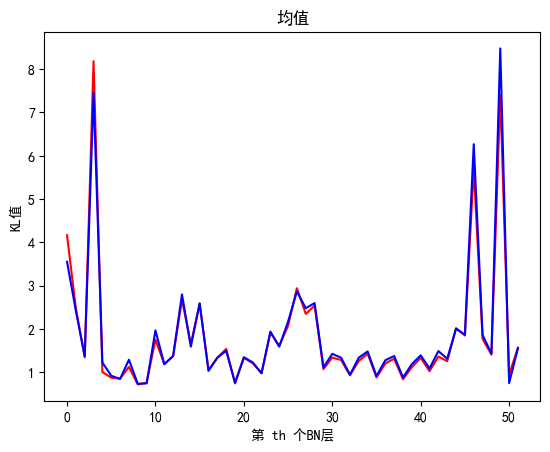

In [44]:
"""mean"""
def plot_line_chart(dis1,dis3):
    x1 = list(range(len(dis1[1:])))  # 创建x轴数据
    y1 = dis1[1:]                   # 创建y轴数据，假设data是你的列表数据
    x3 = list(range(len(dis3[1:])))  # 创建x轴数据
    y3 = dis3[1:]                   # 创建y轴数据，假设data是你的列表数据
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams["axes.unicode_minus"] = False
    plt.plot(x1, y1, color="red")             # 绘制折线图
    plt.plot(x3, y3, color="blue")             # 绘制折线图
    plt.xlabel('第 th 个BN层')          # 设置x轴标签
    plt.ylabel('KL值')          # 设置y轴标签
    plt.title('均值')        # 设置图表标题

    plt.show()                 # 显示图表
# 调用函数绘制折线图
plot_line_chart(dis1,dis3)

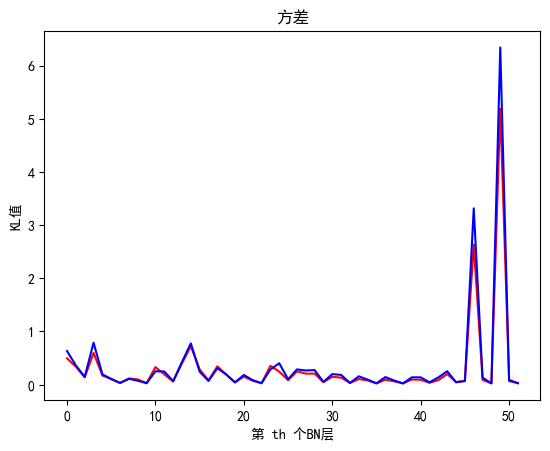

In [45]:
"""var"""
def plot_line_chart(dis2,dis4):
    x2 = list(range(len(dis2[1:])))  # 创建x轴数据
    y2 = dis2[1:]                   # 创建y轴数据，假设data是你的列表数据
    x4 = list(range(len(dis4[1:])))  # 创建x轴数据
    y4 = dis4[1:]                   # 创建y轴数据，假设data是你的列表数据
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams["axes.unicode_minus"] = False
    plt.plot(x2, y2, color="red")             # 绘制折线图
    plt.plot(x4, y4, color="blue")             # 绘制折线图
    plt.xlabel('第 th 个BN层')          # 设置x轴标签
    plt.ylabel('KL值')          # 设置y轴标签
    plt.title('方差')        # 设置图表标题

    plt.show()                 # 显示图表
# 调用函数绘制折线图
plot_line_chart(dis2,dis4)

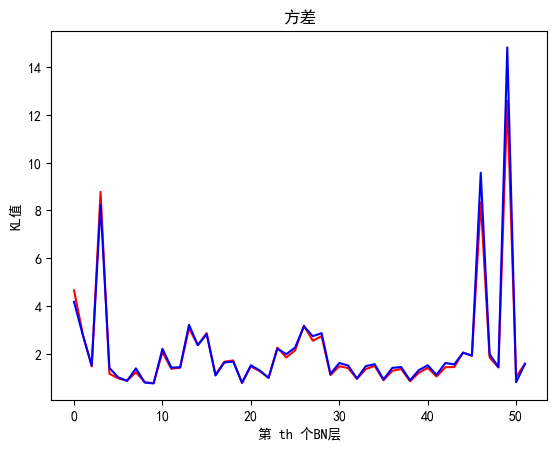

In [46]:
"""mean+var"""
def plot_line_chart(dis1,dis2,dis3,dis4):
    x = list(range(len(dis1[1:])))  # 创建x轴数据
    x_ = list(range(len(dis3[1:])))  # 创建x轴数据
    y = []
    y_ = []
    for idx in range(1,len(dis1)):
        y.append(dis1[idx] + dis2[idx])                  # 创建y轴数据，假设data是你的列表数据
        y_.append(dis3[idx] + dis4[idx])                # 创建y轴数据，假设data是你的列表数据
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams["axes.unicode_minus"] = False
    plt.plot(x, y, color="red")             # 绘制折线图
    plt.plot(x_, y_, color="blue")             # 绘制折线图
    plt.xlabel('第 th 个BN层')          # 设置x轴标签
    plt.ylabel('KL值')          # 设置y轴标签
    plt.title('方差')        # 设置图表标题

    plt.show()                 # 显示图表
# 调用函数绘制折线图
plot_line_chart(dis1,dis2,dis3,dis4)